In [1]:
# use the package and read the nutrition file
library(readr)
DF1 <- read_csv("nutrition_subset.csv")
print(DF1)

Parsed with column specification:
cols(
  `food item` = col_character(),
  weight_in_grams = col_double(),
  saturated_fat = col_double(),
  cholesterol = col_double()
)


# A tibble: 961 x 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 GELATIN; DRY                  1 EN…             7             0             0
 2 SEAWEED; SPIRULINA; DRIED     1 OZ             28.4           0.8           0
 3 YEAST; BAKERS; DRY; ACTIVE    1 PKG             7             0             0
 4 PARMESAN CHEESE; GRATED       1 OZ             28.4           5.4          22
 5 PARMESAN CHEESE; GRATED       1 CUP           100            19.1          79
 6 PARMESAN CHEESE; GRATED       1 TB…             5             1             4
 7 YEAST; BREWERS; DRY           1 TB…             8             0             0
 8 LAMB;CHOPS;ARM;BRAISED;LEAN   1.7 …            48             2.9          59
 9 TUNA; CANND; DRND;WATR; WHITE 3 OZ             85             0.3          48
10 NONFAT DRY MILK; INSTANTIZED  1 CUP            68             0.3          12
# … with

In [2]:
# sort the saturated_fat in decresing order then, print the top five 
head(DF1[order(DF1$saturated_fat, decreasing=TRUE), 3], 5)


saturated_fat
119.9
118.3
92.0
90.1
80.4


In [3]:
# create a new variable and use saturated fat divided by weight in grams
saturated_fat_per_grams <- DF1$saturated_fat/DF1$weight_in_grams

# add new variable as a new column
DF1$saturated_fat_per_grams <- saturated_fat_per_grams

# sort the new variable and print the top five in decresing order
head(DF1[order(DF1$saturated_fat_per_grams, decreasing=TRUE), 5], 5)

saturated_fat_per_grams
0.5071429
0.5071429
0.5053097
0.5053097
0.5000000


In [4]:
# use default to calculate the z-score
DF1$scaled_saturated_fat_per_grams <- scale(x = DF1$saturated_fat_per_grams)

summary(DF1$scaled_saturated_fat_per_grams)

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  

In [5]:
# Determine the three sigma rule for high outliers

three_sigma_rule <- (DF1$saturated_fat_per_grams > 3 )


# calculate the outliers 
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
DF1$saturated_fat_per_grams[which(three_sigma_rule)]

There are 0 outliers 

The scaled age values that are outliers: 



numeric(0)

In [6]:
# Determine the three sigma rule for low outliers

three_sigma_rule2 <- (DF1$saturated_fat_per_grams < -3 )



# calculate the outliers 
cat ("There are", sum(three_sigma_rule2), "outliers \n\n")

cat("The scaled age values that are outliers: \n\n")
DF1$saturated_fat_per_grams[which(three_sigma_rule2)]

There are 0 outliers 

The scaled age values that are outliers: 



numeric(0)

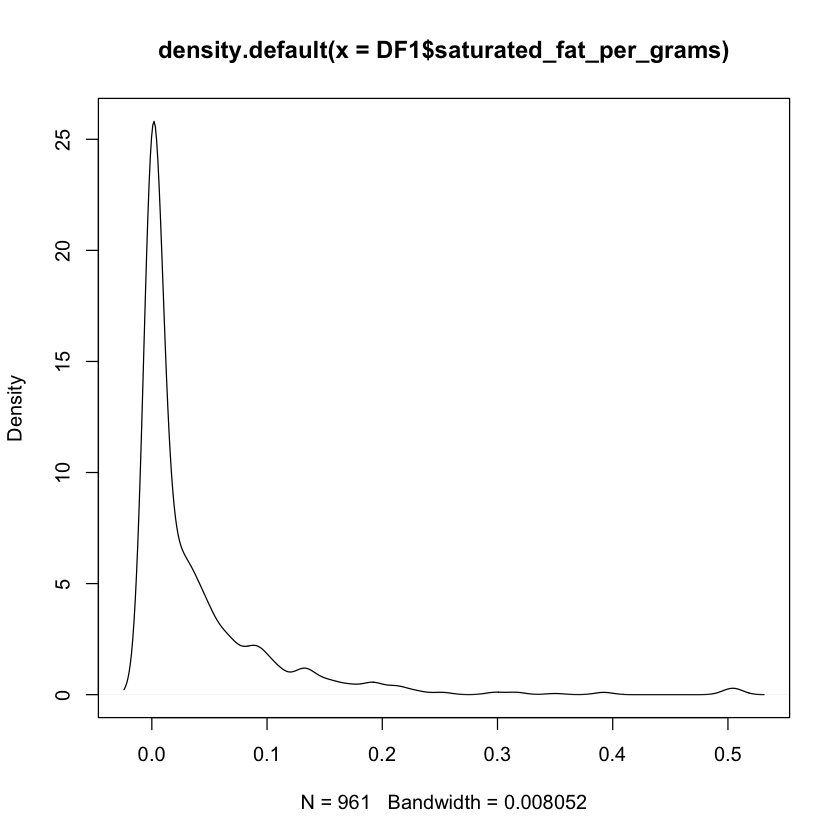

In [7]:
#  Density Plot
DF1Density <- density(DF1$saturated_fat_per_grams) # returns the density data 
plot(DF1Density) # plots the results

In [8]:
# Install and load Hmisc

install.packages("Hmisc")
library(Hmisc)

# calculate the missing values
cat("No. missing values = ", sum(is.na(DF1$saturated_fat_per_grams)), "\n\n")

# view the data before imputation
cat("Before imputation: ", head(DF1$saturated_fat_per_grams, 10), "...\n")

# impute missing values with the median value 
DF1$saturated_fat_per_grams_imputed <- with(DF1, impute(saturated_fat_per_grams, median))

cat("After imputation: ", head(DF1$saturated_fat_per_grams_imputed, 10), "...\n\n\n")

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘survival’, ‘latticeExtra’, ‘htmlTable’

Warning message in install.packages("Hmisc"):
“installation of package ‘png’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘jpeg’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘checkmate’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘survival’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘latticeExtra’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘htmlTable’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


In [9]:
# use default to calculate the z-score for numeric values
DF1$weight_in_grams <- scale(x = DF1$weight_in_grams)

summary(DF1$weight_in_grams)

       V1         
 Min.   :-0.8471  
 1st Qu.:-0.6674  
 Median :-0.2070  
 Mean   : 0.0000  
 3rd Qu.: 0.3899  
 Max.   : 7.9165  

In [10]:
# Determine the three sigma rule for high outliers

three_sigma_rule3 <- (DF1$weight_in_grams > 3 |
                     DF1$weight_in_grams < -3)


# calculate the outliers 
cat ("There are", sum(three_sigma_rule3), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
DF1$weight_in_grams[which(three_sigma_rule3)]

There are 22 outliers 

The scaled age values that are outliers: 



[1] 4.323765 6.887585 5.460714 3.840561 3.567693 5.443659 7.882415 5.449344
 [9] 4.323765 5.108259 5.631256 3.925832 5.449344 5.199215 5.381127 5.904124
[17] 4.522731 4.522731 4.522731 4.522731 4.323765 7.916524

In [11]:
# use default to calculate the z-score for numeric values
DF1$saturated_fat <- scale(x = DF1$saturated_fat )

summary(DF1$saturated_fat )

# Determine the three sigma rule for  outliers

three_sigma_rule4 <- (DF1$saturated_fat  > 3 |
                     DF1$saturated_fat  < -3)


# calculate the outliers 
cat ("There are", sum(three_sigma_rule4), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
DF1$saturated_fat [which(three_sigma_rule4)]

       V1         
 Min.   :-0.3711  
 1st Qu.:-0.3711  
 Median :-0.3339  
 Mean   : 0.0000  
 3rd Qu.:-0.0640  
 Max.   :10.7882  

There are 20 outliers 

The scaled age values that are outliers: 



[1]  4.059096 10.788208  4.468613  4.803673  5.771622  4.077710  3.184218
 [8]  8.191497  6.264904  3.500663 10.639293  8.014660  4.729215  3.928795
[15]  4.943281  4.943281  7.111860  3.025996  3.277290  4.403463

In [12]:
# use default to calculate the z-score for numeric values
DF1$cholesterol <- scale(x = DF1$cholesterol )

summary(DF1$cholesterol )

# Determine the three sigma rule for  outliers

three_sigma_rule5 <- (DF1$cholesterol  > 3 |
                     DF1$cholesterol  < -3)


# calculate the outliers 
cat ("There are", sum(three_sigma_rule5), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
DF1$cholesterol [which(three_sigma_rule5)]

       V1         
 Min.   :-0.2714  
 1st Qu.:-0.2714  
 Median :-0.2714  
 Mean   : 0.0000  
 3rd Qu.:-0.1046  
 Max.   :16.8426  

There are 17 outliers 

The scaled age values that are outliers: 



[1]  3.146420  4.355150  8.148063  5.063716 16.842585  8.898309  4.471855
 [8]  4.330142  4.713601  9.590203  4.530208  5.188757  6.872644  4.805298
[15]  3.696601  5.030372  5.588889